# Molecular Dynamics simulation of SARS Cov2 main protease in complex with inhibitor

Developed in the CADD Seminar 2020, AG Volkamer, Charité/FU Berlin 

Authors:
- Pietro Gerletti
- David Schaller
- Mareike Leja

__Talktorial T18__

__Note__

The notebook presented here is designed to be run on Google Colab. It is possible to run it on a normal laptop, if sufficient computational power is available, preferably on a GPU.

## Aim of this talktorial

At the end of this talktorial we want to perform a Molecular Dynamics Simulation of a protein in complex with a ligand. We will follow the steps from obtaining and fixing a structure, to creating a forcefield and finally running the simulation.

## Learning goals


### Contents in *Theory*


* Main protease of SARS-CoV-2 
* Molecular dynamics
* Force fields
* Boundary conditions
* Summary

### Contents in *Practical*

* Set up
  * Installation
  * Imorts
  * PDB file download
* Fix PDB file
  * Add missing atoms and residues to protein
  * Add missing hydrogens to ligand
* Merge protein and ligand
* Molecular Dynamics simulation set up
  * Force field
  * System
* Run the simulation
  * Download results

### References

* De Vivo M, Masetti M, Bottegoni G, Cavalli A. *Role of Molecular Dynamics and Related Methods in Drug Discovery*
([<i>J Med Chem.</i> (2016), <b>59</b>(9), 4035‐4061](https://pubs.acs.org/doi/10.1021/acs.jmedchem.5b01684))

* Sereina Riniker, *Fixed-Charge Atomistic Force Fields for Molecular Dynamics Simulations in the Condensed Phase: An Overview*
([<i>Journal of Chemical Information and Modeling</i> (2018), <b>58</b>(3), 565-578](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00042))

* Mesecar A.D., *A taxonomically-driven approach to development of potent, broad-spectrum inhibitors of coronavirus main protease including SARS-CoV-2*

* Marina Macchiagodena, Marco Pagliai, Piero Procacci, *Identification of potential binders of the main protease 3CLpro of the COVID-19 via structure-based ligand design and molecular modeling*
([<i>Chemical Physics Letters</i> (2020), <b>750</b>](https://iupac.org/publications/pac/70/5/1129/))

* Sumit Sharma, Pramod Kumar, Rakesh Chandra *Chapter 1 - Introduction to Molecular Dynamics*
([<i>Molecular Dynamics Simulation of Nanocomposites Using BIOVIA Materials Studio, Lammps and Gromacs</i> (2019)](https://doi.org/10.1016/B978-0-12-816954-4.00001-2))

* P. S. de Laplace, *Oeuvres Complètes de Laplace. Théorie Analytique des Probabilités*
(<i>volume VII Gauthier-Villars</i> (1820), 3rd ed)


* Jaime Rodríguez-Guerra, Volkamer lab, Charité [Molecular Dynamics Simulation and Analysis in a Notebook](https://github.com/jaimergp/uab-msc-bioinf/blob/master/MD%20Simulation%20and%20Analysis%20in%20a%20Notebook.ipynb)

* [OpenMM](https://github.com/openmm/openmmforcefields)

* [PDB Fixer](http://htmlpreview.github.io/?https://raw.github.com/pandegroup/pdbfixer/master/Manual.html)
* Wikipedia Articles about [AMBER](https://en.wikipedia.org/wiki/AMBER)
and [Force Fields](https://en.wikipedia.org/wiki/Force_field_(chemistry))

## Theory

In this notebook we will focus on how to perform molecular dynamics (MD) simulations of a protein in complex with a small ligand molecule. Here, the main protease of SARS-CoV-2 in complex with the inhibitor X77 is used. Therefore a short introduction to SARS-CoV-2 and the protease is included. 



### Main protease of SARS-CoV-2 

SARS-CoV-2 genome encodes, between others, polyproteins that are cleaved and transformed to non-structural proteins by proteases. These non-structural proteins play a fundamental role in the pathogenesis. Blocking their production could significantly reduce the virulence of SARS-CoV-2. One possible way of doing this is to inhibit the viral proteases needed for the correct cleaving of the non-structural proteins. This makes the main protease of SARS-CoV-2 a candidate target for the development of a much needed antiviral drug. Here we used the pdb structure of the protease in complex with the inhibitor X77 provided by Mesecar (2020) to perform a MD simulation, providing a 1 ns molecular trajectory. 

![SARS-CoV-2](https://cdn.rcsb.org/images/structures/w6/6w63/6w63_assembly-1.jpeg)

*Figure 1*: Structure of COVID-19 main protease bound to potent broad-spectrum non-covalent inhibitor X77, Mesecar A.D. (2020), on [RCSB](https://www.rcsb.org/structure/6w63) 

### Molecular dynamics

MD is a computational method for analyzing how the atoms and molecules of a system move and interact with each other. The method stems from theoretical physics, where it was developed in the years around 1950, although the ideas behind it can be dated much earlier:

*An intelligence which could, at  any moment, comprehend all the forces by  which nature is animated and the  respective positions of the  beings of which it is  composed, and moreover, if this intelligence were far-reaching enough to subject these data to  analysis, it would encompass in that formula both the movements of the  largest bodies in  the universe and those of the lightest atom: to it nothing would be uncertain, and the  future, as well as the past, would be present to its eyes. The human mind offers us, in the perfection which it has  given to  astronomy, a faint sketch of this intelligence.*

__Pierre Simon de Laplace, 1820 A.D.__


This statement brings up discussions about whether it is possible to actually predict every future state of a system by knowing EVERYTHING about its components and the laws governing it (which would take us through discussing chaos and randomness in mathematical philosophy up to relativity vs quantum physics and beyond... but if you are interested in the topic(s), here is a very interesting documentary on [youtube](https://www.youtube.com/watch?v=XDpurdHKpb8).
Let us just take this statement by de Laplace as the ideological substrate underneath molecular dynamics simulations. In other terms, we can approximate the behavior of a physical system by knowing the characteristics of its components and applying Newton's motion laws. By solving the equations of motion, we can obtain a molecular trajectory of the system, i.e. a series of snapshots with the positions and velocities of all its particles, as well as its potential energy. To do so we define functions, called force fields, which provide an approximate description of all the forces applied to each particle in the system. We then use numerical integrators to solve the initial value problem for the system and obtain the trajectory. As it sounds, the process requires quite a bit of processing power and it was only few years ago that MD started seeing a more widespread use, especially in the field of computational chemistry and biology, as well as in drug discovery.

![MD Rotor](https://upload.wikimedia.org/wikipedia/commons/b/b6/MD_rotor_250K_1ns.gif)

*Figure 2*: Molecular dynamics ~1 nanosecond movie of rotation of a supramolecule composed of three molecules in a confined nanoscopic pore (outer diameter = 6.7 nm) on a silver surface at ~ 250 K; Palma, C.-A.; Kühne, D.; Klappenberger, F.; Barth, J.V. - Technische Universität München, on <a href="https://commons.wikimedia.org/w/index.php?curid=34866205">Wikimedia</a></p>

We will now dig a bit deeper in the equations behind MD, the force fields, to gain a better understanding how what we will be doing in the practical part.

### Force fields



Force fields describe the forces between the atoms within and between the molecules. They are parametric equations with different components, each corresponding to a precise interaction (e.g. bond torsion angles, steric hindrance, etc.). The parameters values are usually derived experimentally and change for each MD scenario, depending on the molecules involved and the simulations settings. The result is a mathematical description of the energy landscape of the system, in which the forces acting on each particle result from the gradient of the potential energy with respect to the coordinates of the atoms.

A lot of different force fields are available, each with its own characteristics. In this notebook, we will use the AMBER force fields, which are widely used for MD simulations of proteins. Their functional form is:

$$V(r^N) = \sum_{i \in  bonds}k_{bi} (l_i-l^0_i)^2 + \sum_{i \in  angles}k_{ai}(\theta_i - \theta^0_i)^2 + \sum_{i\in torsions} \sum_n \frac{1}{2} V_i^n[1+cos(nw_i-\gamma_i)] + \sum_{j=1}^{N-1}\sum_{I=j+1}^{N} f_{ij}\in ij [(\frac{r^0_{ij}}{r_{ij}})^{12}-2(\frac{r^0_{ij}}{r_{ij}})^{6}]+\frac{q_iq_j}{4\pi \in_0 r_{ij}}$$

The formula consists of a sum of different components, each describing a different interaction: the first two contain information about bonds length and their angles (intramolecular forces), the third term describes torsional forces and the last component describes intermolecular, non-bonded forces like Van-der-Waals and electrostatic energies. The various parameters, denoteb by a superscricpt 0, depend on the forcefield used and vary between all members of the AMBER forcefield family.
Note that these force fields assume fixed-charge particles and do not allow polarization, nor do they consider how a local charge influences its surroundings. 

The following visual representation of force fields components shows the same concepts in a more intuitive way.

![physics](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/MM_PEF.png/1200px-MM_PEF.png)

*Figure 3*: Physics on a molecular scale, Dhatfield on <a href="https://commons.wikimedia.org/w/index.php?curid=4194424">Wikimedia</a></p>

After selecting a force field to run the MD Simulation with, the equation needs to be parametrized according to the specific scenario we wish to simulate. In this process, an algorithm will fetch the parameters needed (in this case we rely on `openforcefields`), taking into account the simulation settings. Usually the process involves these basic steps (but it can vary):

* fetch the crystal structure/chemical formula
* define atom types
* get atomic charges
* assign initial Lennard-Jones and bond parameters 
* test density and geometry (reference data)
* test energetic properties (surface and hydration energy - compare with reference data)

Once the force field is parametrized, the simulation basically consists in solving a differential equations system and saving the resulting trajectory.

###Boundary conditions

Usually the structures are simulated in a box filled with a solvent of choice. The box is finite, which gives rise to corner cases and influences the interaction.
To avoid these cases and approximate a large or possibly infinite system __Periodic Boundary Conditions (PBCs)__ are used. The simulation box is surrounded by replicas of itself. To fulfil the PBCs, two procedures are needed: particles leaving the simulation box need to be treated and applicable forces from the surrounding virtual boxes need to be included.
Sometimes PBCs are used in a way, that particles leaving the box on one side re-appear on the other side with the same velocity.
Whichever exact conditions are used, it is still recommended to use a simulation box large enough that a simulated macromolecule does not come into interaction with neighbouring images of itself. 

###Summary

Wrapping up, molecular dynamics simulate the trajectory of a physico-chemical system by using force fields to describe the interactions between each atom in the system, applying classical physics' law of motions and solving the equations by employing numerical methods that take advantage of the high performance processors of modern computers. This means no statistical mechanics nor quantum physics knowledge is included in the method, although there is ongoing research in the field of quantum force fields. Surprisingly, such deterministic, classical-physics-based description of a physico-chemical system works well enough to provide us with useful insights into what happens at a spatiotemporally not observable scale.

This, in turn, gives valuable insight into the highly dynamic processes of molecular interactions. When a small molecule (ligand) finds a macromolecule (protein) in a solution, it encounters a structure in conctant motion. 

### MD Simulation and Drug Design

Even short simulations give valuable insight into the highly dynamic processes of molecular interactions. When a small molecule (ligand) finds a macromolecule (protein) in a solution, it encounters a structure in constant motion. Additionally, the molecules interact and may induce conformational changes pushing the structure to a conformation, that can best accomodate a binding. Those conformations may not be typically sampled with static methods when a ligand is absent. Fittingly, binding sites that are not obvious from static structures, but can be discovered with MD Simulations, are sometimes called *cryptic binding sites*. 
The identification of binding sites with MD Simulation can kickstart the drug discovery journey. Later in the process, the simulations can be used for evaluation of binding. 
Alltogether, MD Simulations pose a valuable asset in computer aided drug design.

## Practical

We will now proceed to implement a simple MD simulation using `openmm` and `openforcefields` on Google Colab.

### Set up 

For installing the packages in Google Colab the path to the python installations packages folder is needed. Given is the default path for Python 3.6.

In [ ]:
lib_path = "/usr/local/lib/python3.6/site-packages"

#### Installation

In [ ]:
import sys
# Download miniconda
!wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local
# install required modules
!conda install -q -y -c omnia --prefix /usr/local/ python=3.6 openmm;
!conda install -q -y -c omnia -c conda-forge --prefix /usr/local/ python=3.6 openmmforcefields;
!conda install -q -y -c omnia -c conda-forge --prefix /usr/local/ python=3.6 rdkit;
!conda install -q -y -c omnia -c conda-forge --prefix /usr/local/ python=3.6 pdbfixer;
!conda install -q -y -c omnia -c conda-forge --prefix /usr/local/ python=3.6 mdtraj;
!conda install -q -y -c omnia -c conda-forge --prefix /usr/local/ python=3.6 MDAnalysis;

!pip install pypdb
# Append path to enable running packages installed with conda
sys.path.append(lib_path)

#Clear the excesive installation outputs
from IPython.display import clear_output
clear_output()
print("done")

done


#### Imports

In [ ]:
# imports
import io
from google.colab import files

import mdtraj as md
import numpy as np
import simtk.openmm as mm
import simtk.openmm.app as app
from simtk.openmm import unit
from simtk.openmm.app import CheckpointReporter, ForceField, PDBFile
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from openforcefield.topology import Molecule, Topology
from openmmforcefields.generators import GAFFTemplateGenerator
from pypdb import *
import pdbfixer

#### PDB File Download
After setting up Google Colab, we need a file to work with. First, we import all needed packages and upload the topology file(s) containing our system.
In this case, we will run the simulation on the SARS-CoV-2 main protease in complex with an inhibitor. 

In [ ]:
folder = Path("data")
folder.mkdir(exist_ok=True)

In [ ]:
pdbid = "6w63"
pdb_path = Path("data") / (pdbid+".pdb")

In [ ]:
pdb_file_string = get_pdb_file(pdbid, filetype='pdb', compression=False)
with open(pdb_path, 'w') as f:
    f.write(pdb_file_string)

In [ ]:
ligand_name = "X77"

### Fix the PDB File

#### Add missing atoms and residues to the protein

One crucial part to a successful simulation is a correct and complete system. PDB files from crystallographic structures often miss atoms, mainly hydrogens, and may have nonstandard residues.
Thus, we need to fix our structure. Several options are available, a common one in python being the package `pdbfixer`. We use it to fix our residues and also remove heterogens, which are any atoms not directly linked to the protein structure. This will remove our ligand as well, but we will add it back later.Also, hydrogens are often not included in PDB-Files, but we will skip the protonation, which means adding missing hydrogens, of the protein for now. It is better done in complex with the already protonated ligand ligand later on.

In [ ]:
def fix_pdb_protein(pdb_file, ignore_missing_residues=True):
    """Use pdbfixer to repair and prepare a pdb file.
    Hetatoms are removed, nonstandard residues replaced and missing atoms added.
  
    Parameters
    ----------
   pdb_file : str
      uploaded pdb file containing a simulateable system
    
    Returns
    -------
    fixer : pdbfixer.pdbfixer.PDBFixer
        fixed protein system
        """
    fixer = pdbfixer.PDBFixer(pdb_file) #fix pdb
    fixer.removeHeterogens()
    #needed to determine any residues with problems
    if(ignore_missing_residues):
      fixer.findMissingResidues() 
    #set the the list of missing residues to 0 so none get added
    fixer.missingResidues = {} 
    fixer.findNonstandardResidues() # find non standard residue
    fixer.replaceNonstandardResidues()# replace non standard residues with standard one
    fixer.findMissingAtoms() # find missing heavy atoms
    fixer.addMissingAtoms() # add missing atoms and residues
    return fixer

In [ ]:
fixed_protein = fix_pdb_protein(str(pdb_path))

#### Add missing Hydrogens to Ligand

After fixing the protein we turn our attention to the ligand. Most libraries handle proteins rather well, but fixing small molecules is a different task.
Thus we have to separately protonate our ligand before adding it back to the complex.
We use RDKit, which is specialized in small molecules.
To correctly add hydrogens, RDKit needs bond-orders in addition to the given bonding information. Those are not generally included in pdb files, so we need to assign some from a template. In this case a SMILES string is used.
We wrap the entire procedure in one function. 


In [ ]:
def protonate_ligand(pdb_file, ligand_resname, ligand_smiles):
    """Protonate a ligand molecule with RDKit. The ligand is extracted from a complex system.
    A smiles string represantation is used as template for bond order assignment. 
    For manual checking a before and after image of the ligand is returned.
  
    Parameters
    ----------
    pdb_file : str
       uploaded pdb file containing a simulateable system
    ligand_name :str
    ligand_simles : str
      smiles representation of ligand to be used as template
    
    Returns
    -------
    lig_mol_h : rdkit.Chem.rdchem.Mol
      protonated ligand
    img : PIL.PngImagePlugin.PngImageFile
    """
    #Split the molecule
    rdkit_mol = Chem.MolFromPDBFile(pdb_file)
    rdkit_mol_split = Chem.rdmolops.SplitMolByPDBResidues(rdkit_mol)

    #Extract Ligand and remove any already present hydrogens
    ligand = rdkit_mol_split[ligand_resname]
    #lig_mol_wo_bond_orders = Chem.RemoveHs(ligand)

    #Assign bond orders from template
    reference_mol = Chem.MolFromSmiles(ligand_smiles)
    lig_mol = AllChem.AssignBondOrdersFromTemplate(reference_mol, ligand)
    lig_mol.AddConformer(ligand.GetConformer(0))

    #protonate ligand
    lig_mol_h = Chem.rdmolops.AddHs(lig_mol, addCoords=True)
    img = Draw.MolsToGridImage([ligand, lig_mol_h], molsPerRow=2, legends=["original","protonated"])
    return lig_mol_h, img

Calling our function returns a correctly protonated ligand, extracted from the file via its name. Additionally, we return a view of the ligand before and after protonation.

In [ ]:
protonated_ligand, ligand_image = protonate_ligand(str(pdb_path), ligand_name,
                                     "CC(C)(C)c1ccc(cc1)N([C@@H](C(=O)NC2CCCCC2)c3cccnc3)C(=O)c4c[nH]cn4")

We can now examine the changes made to our molecule.

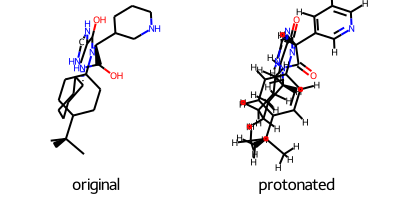

In [ ]:
ligand_image

### Merge protein and ligand
In the next step we want to merge the protonated ligand with the protein using MDTraj. MDTraj Molecules can be loaded from OpenMM Topologies. We need to do some conversions, since our protonated ligand is an RDKit Molecule at the moment.
We write a function, that handles the conversion and adds some naming information back in, which we lost in RDKit.

In [ ]:
def convert_rdkit_to_openmm(molecule, molecule_name="lig"):
    """Merge two OpenMM Structures together using MDTraj.
    
    Parameters
    ----------
    molecule : rdkit.Chem.rdchem.Mol
    molecule_name : str, optional
    
    Returns
    -------
    off_mol : openforcefield.topology.molecule.Molecule
    mol_topology : simtk.openmm.app.topology.Topology
    mol_positions : simtk.unit.quantity.Quantity
    """
    #Convert RDKit to OpenFF
    off_mol = Molecule.from_rdkit(molecule)

    #Add naming of molecule and atoms
    off_mol.name = molecule_name
    atom_names = {
        1: "H",
        6: "C",
        7: "N",
        8: "O"
        }
      
    for off_atom, rdkit_atom in zip(off_mol.atoms, molecule.GetAtoms()):
      if(rdkit_atom.GetPDBResidueInfo() is not None):
        off_atom.name = rdkit_atom.GetPDBResidueInfo().GetName()

    #Convert from OpenFF to OpenMM
    off_mol_topology = off_mol.to_topology()
    mol_topology = off_mol_topology.to_openmm()
    mol_positions = off_mol.conformers[0]
    
    #Convert Units from Ångström to Nanometers
    for atom in mol_positions:
        coords = atom / atom.unit
        atom = (coords / 10.0) * unit.nanometers  # since openmm works in nm
        
    return off_mol, mol_topology, mol_positions

In [ ]:
off_molecule, ligand_topology, ligand_positions = convert_rdkit_to_openmm(protonated_ligand, ligand_name)

Our fixed Protein is already in OpenMM format and can now be merged with the converted ligand.

In [ ]:
def merge_protein_and_ligand(protein, ligand_topology, ligand_positions):
    """Merge two OpenMM Structures together.
  
    Parameters
    ----------
    protein : pdbfixer.pdbfixer.PDBFixer
    ligand_topology : simtk.openmm.app.topology.Topology
    ligand_positions : simtk.unit.quantity.Quantity
    
    Returns
    -------
    complex_topology : simtk.openmm.app.topology.Topology
    complex_positions : simtk.unit.quantity.Quantity
    """
    #Combine Topologies
    md_protein_topology = md.Topology.from_openmm(protein.topology)  # using mdtraj for protein top
    md_ligand_topology = md.Topology.from_openmm(ligand_topology)  # using mdtraj for ligand top
    md_complex_topology = md_protein_topology.join(md_ligand_topology)  # add them together
    complex_topology = md_complex_topology.to_openmm()

    #Combine Positions
    total_atoms = len(protein.positions) + len(ligand_positions)
    #Create a OpenMM Quantity Array of right size
    complex_positions = unit.Quantity(np.zeros([total_atoms, 3]), unit=unit.nanometers)
    complex_positions[0 : len(protein.positions)] = protein.positions #add protein positions
    complex_positions[len(protein.positions)+1 : total_atoms] = ligand_positions #add ligand positions

    return complex_topology, complex_positions

In [ ]:
complex_topology, complex_positions = merge_protein_and_ligand(fixed_protein, ligand_topology, ligand_positions)

### Molecular dynamics simulation set up

We can now use the fixed pdb to set up the MD simulation. 

#### Force field
We use the General Amber ForceField (GAFF) which includes parameters for small molecules and is able to generate a template for them. This is needed for the force field to be set up properly otherwise the protein force field has "no knowledge" of the ligand. The following function generates a force field object using a protein and a solvation forcefield and additionally includes a generated template for a small molecule of choice.

In [ ]:
def generate_forcefield(molecule = None, protein_ff = "protein.ff14SB.xml", solvation_ff = "tip3p.xml"):
    """Generate an OpenFF Forcefield and register a small molecule template.
  
    Parameters
    ----------
    molecule : openforcefield.topology.molecule.Molecule, optional
    protein_ff : string, optional
      Name of the protein forcefield 
    solvent_ff : string, optional
      Name of the solvation forcefield
    Returns
    -------
    complex_topology : simtk.openmm.app.topology.Topology
    complex_positions : simtk.unit.quantity.Quantity
    """
    protein_forcefield = Path(lib_path) / "simtk/openmm/app/data/amber14" / protein_ff
    solvation_forcefield = Path(lib_path) / "simtk/openmm/app/data/amber14" / solvation_ff

    forcefield = app.ForceField(protein_forcefield, solvation_forcefield)

    if(molecule is not None):
        gaff = GAFFTemplateGenerator(molecules=molecule)
        forcefield.registerTemplateGenerator(gaff.generator)

    return forcefield

In [ ]:
forcefield = generate_forcefield(off_molecule)

#### System

With our configured forcefield we can now create the MD environment containing the complex and add the solvent we wish to simulate in, in this case water. Once the system is solvated we save its pdb file and proceed in setting up the simulation.
Remember how we did not protonate the protein but rather only the ligand in an earlier step. Now we add the hydrogens to our complex protonating the protein with a modeller object.

In [ ]:
# Add solvent
modeller = app.Modeller(complex_topology, complex_positions)
modeller.addHydrogens(forcefield); #Protonate System
modeller.addSolvent(forcefield, padding=1.0*unit.nanometers,
                    model='tip3p', ionicStrength=0.15*unit.molar)
# Save PDB file of solvated molecule
app.PDBFile.writeFile(modeller.topology,
                      modeller.positions,
                      open('data/MD_system.pdb', 'w'))

With our solvated complex and the forcefield we can finally create a system and set up the simulation.

In [ ]:
system = forcefield.createSystem(modeller.topology, nonbondedMethod=app.PME)
integrator = mm.LangevinIntegrator(300*unit.kelvin,
                                1.0/unit.picoseconds,
                                2.0*unit.femtoseconds)
simulation = app.Simulation(modeller.topology, system, integrator)

### Run the MD simulation
Now that everything is set-up we can run the simulation. We need to set starting positions and minimize the energy of the system, to get a viable and stable starting configuration. This gets rid of any misconfigurations like overlapping atoms and ensures a consistent simulation.

Once that is done, we can let the simulation run! Here we are simulating 1 ns. We save one molecular "snapshot" every 5000 steps, for a total of 100 frames out of the 500.000 steps we are taking. The results are saved in a .dcd files, which contains the coordinates of all the atoms at a given time point. Together with the pdb file of the system, it gives us all the information about our simulation.  

In [ ]:
# Initialize the MD simulation
print('Setting up positions...')
simulation.context.setPositions(modeller.positions)

Setting up positions...


In [ ]:
# Minimize energy
print('Energy minimization in progress...')
simulation.minimizeEnergy()

Energy minimization in progress...


In [ ]:
# Output settings
simulation.reporters.append(app.DCDReporter('data/trajectory.dcd', 5000))

# Output data
simulation.reporters.append(app.StateDataReporter(sys.stdout, 5000, step=True,
                                                  potentialEnergy=True, temperature=True, progress=True, remainingTime=True,
                                                  speed=True, totalSteps=5*1e5, separator='\t'))

# Set velocities
simulation.context.setVelocitiesToTemperature(300*unit.kelvin)

In [ ]:
# Run the simulation
simulation.step(5*1e5)

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
1.0%	5000	-858103.0852457723	298.1333615937341	0	--
2.0%	10000	-856464.3352457723	299.6679223336799	92.4	15:15
3.0%	15000	-856045.0852457723	301.729752319867	92.6	15:04
4.0%	20000	-855027.8352457723	300.92916434805954	91.9	15:02
5.0%	25000	-855406.3352457723	300.22457070326294	91.3	14:58
6.0%	30000	-855771.5852457723	299.8384060119578	90.7	14:55
7.0%	35000	-855831.0852457723	300.2787543543008	90.4	14:48
8.0%	40000	-855188.5852457723	302.21729853116085	89.8	14:44
9.0%	45000	-856139.3352457723	302.6191541859233	89.3	14:40
10.0%	50000	-854557.3352457723	301.0369487197796	88.8	14:36
11.0%	55000	-855315.0852457723	300.2969940643097	88.3	14:30
12.0%	60000	-854543.0852457723	299.686586769068	87.8	14:25
13.0%	65000	-855212.0852457723	302.77554547072793	87.5	14:18
14.0%	70000	-855819.3352457723	299.5695645494645	87.4	14:10
15.0%	75000	-856991.8352457723	299.99599618991743	87.3	14:01
16.0%	800

#### Download results

In [ ]:
files.download('data/MD_system.pdb')
files.download('data/trajectory.dcd')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We have successfully performed a MD simulation! If you want to know how to visualize the results, you can refer to the next notebook in the repository.   
   
As last I would like to add a quick note about the run-time. We saw that running this kind of simulations can be quite computationally expensive and long. Here on Google Colaboratory we achieved a speed of 3.7 ns/day, which is manageable but still slow, especially if we need to run longer simulations and multiple times with different settings. I also tried running the same simulation on a Ubuntu VM on Virtualbox (Windows 10 host), achieving 1 ns/day as speed. Given that it was running on 4 virtual cores (host processor Intel core i7 8th gen) and not on the host machine 8 cores, it was probably a bit slower than it could have been, but it is clear that CPU is not the way to go for such applications. GPU parallel computations allow to reduce the run time exponentially and should always be preferred.  